# Assignment - Clustering

#### 1. Reproduce E8-1: K-Means algorithm with your own data file (feel free to use freedom.csv or another data source file from the DSC repository)

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

from sklearn import datasets

In [99]:
# Load input data
# df = pd.read_csv("s-originals/s1-cb.txt", sep=" ")
df = datasets.load_iris()
df = pd.DataFrame(df.data)

In [100]:
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [102]:
df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [103]:
# to check null values in data
df.isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [104]:
df = df.dropna(axis=1)

In [105]:
df.isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [106]:
X = df.values
len(X)

150

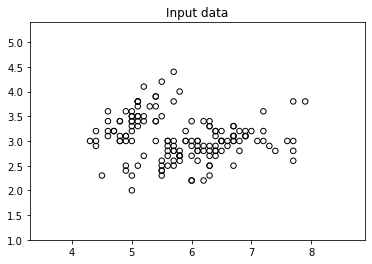

In [107]:
# Plot the input data
plt.figure()
plt.title('Input data')

# first column
x_min = X[:, 0].min()
x_max = X[:, 0].max()

# second column
y_min = X[:, 1].min()
y_max = X[:, 1].max()

# set plot limits
plt.xlim(x_min - 1, x_max + 1)
plt.ylim(y_min - 1, y_max + 1)

# plot the points
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', edgecolors='black', s=30)

plt.show()

In [108]:

# Determine k by minimizing the distortion - 
# the sum of the squared distances between each observation vector and its centroid
distortions = []
K = range(2,20)
for k in K:
    model = KMeans(n_clusters=k).fit(X)
    model.fit(X)
    distortions.append(sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]) 
print("Distortion: ", distortions)

Distortion:  [0.8555777695266533, 0.6480304904934434, 0.5573847727333312, 0.5096521951118286, 0.4686562135056527, 0.4382367304096589, 0.41086768314893807, 0.39732605755395806, 0.38522553102381185, 0.3670893352046722, 0.3569926384279823, 0.353813058373897, 0.3395139164588132, 0.32557575181930104, 0.3235566974081402, 0.3144725929040609, 0.3029325330835936, 0.2928119290414195]


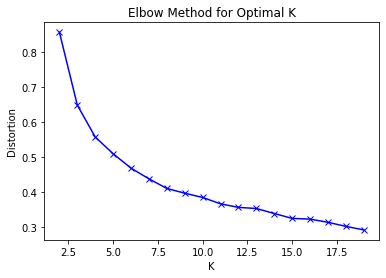

In [109]:
# Plot the elbow
plt.title('Elbow Method for Optimal K')
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

In [110]:
# Optimal number of clusters K
num_clusters = 5

In [111]:
# Create an instance of KMeans classifier
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=20)
# init: method of experimemtal finding the initial location of the centroids
# n_init: the algorithm will run n_init times with different cetroids and the best result of those will be taken

# Train the KMeans clustering model
kmeans.fit(X)

KMeans(n_clusters=5, n_init=20)

In [112]:
# Predict 5 clusters in X
y = kmeans.predict(X)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 2, 4, 2,
       2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2,
       4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4, 3, 2, 0, 3, 3, 0, 4, 0, 3, 0,
       3, 3, 3, 2, 3, 3, 3, 0, 0, 2, 3, 2, 0, 2, 3, 0, 2, 2, 3, 0, 0, 0,
       3, 2, 2, 0, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2])

In [113]:
# See the predicted labels of clusters
# cluster labels are stored in variable 'kmeans.labels_'
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 4 2 2 2 4 2 4 4 2 4 2 4 2 2 4 2 4 2 4 2 2
 2 2 2 2 2 4 4 4 4 2 4 2 2 2 4 4 4 2 4 4 4 4 4 2 4 4 3 2 0 3 3 0 4 0 3 0 3
 3 3 2 3 3 3 0 0 2 3 2 0 2 3 0 2 2 3 0 0 0 3 2 2 0 3 3 2 3 3 3 2 3 3 3 2 3
 3 2]


Cluster  0 :  (12, 4)


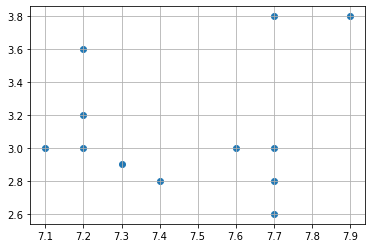

Cluster  1 :  (50, 4)


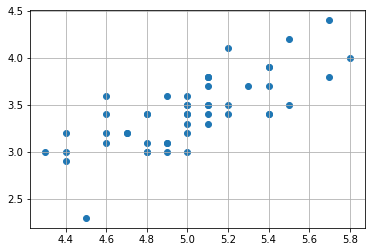

Cluster  2 :  (39, 4)


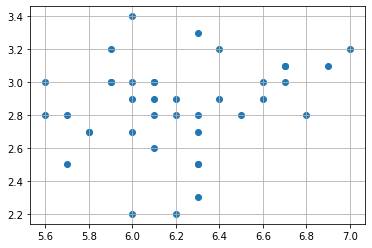

Cluster  3 :  (24, 4)


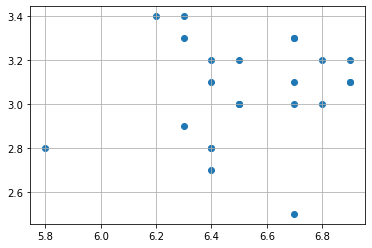

Cluster  4 :  (25, 4)


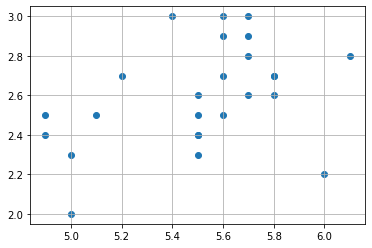

In [114]:
# Split the clusters, for demo purpose only
for i in range(num_clusters):
    # slice the cluster
    cluster = X[y == i]    
    # print the shape
    print("Cluster ", i, ": ", cluster.shape)    
    # plot the points of this cluster
    plt.scatter(cluster[:, 0], cluster[:, 1])   
    plt.grid(True)
    plt.show()

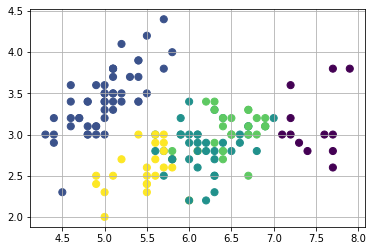

In [115]:
# Plot the points with color code of the predicted clusters
# viridis - a color map, https://matplotlib.org/users/colormaps.html
# s - marker size, here, the dots size
# c - marker color, here taken from the predicted clusters
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')

plt.grid(True)
plt.show()

In [116]:
# See the cluster centres, created during the clustering
# cluster centres are stored in a variable named 'cluster_centers_'
print(kmeans.cluster_centers_)

[[7.475      3.125      6.3        2.05      ]
 [5.006      3.428      1.462      0.246     ]
 [6.20769231 2.85384615 4.74615385 1.56410256]
 [6.52916667 3.05833333 5.50833333 2.1625    ]
 [5.508      2.6        3.908      1.204     ]]


### Store the KNN-Model in a file

In [117]:
!pip install joblib

In [118]:
import joblib
joblib.dump(kmeans, 'knn-model.pkl')

['knn-model.pkl']

## Flask api'et er lavet i visual studio og der er vedhæftet et screenshot der ligger i samme mappe som denne fil 

#### 2. Run the notebook from E8-3: Hierarchical and note the difference between this algorithm and the previous one. Write an answer to the questions

How many types of hierarchical clustering are shown in the exercise?

https://github.com/datsoftlyngby/soft2021spring-ds/blob/main/Code/E8-3-Hierarchical.ipynb

### Lidt forvirret over denne opgave. Vi kan se der er tale om AgglomerativeClustering i selve opgaven men før opgaven står der AGglomerative NESting vs DIvisible ANAlysis så måske mangler der noget i notebooken.

How do they differ?

som sagt i svaret på sidste spørgsmål kunne vi kun se en 


#### 3. Run the notebook from E9-4: Mean Shift. Try to experiment the solution with various number of clusters. Observed the process of implementation of the Mean Shift algorithm and answer the questions:

What is the difference between k-means and mean shift?

- Mean-Shift algorithm determines the number of clusters and formes the clusters. It is a type of unsupervised machine learning algorithm. Unlike the more popular K-Means clustering, mean shift doesn’t require an estimate of the number of clusters. Instead, it creates a Kernel Density Estimation (KDE) for the dataset. KDE is a method to estimate the distribution of the data points. It works by placing a kernel on each data point. The kernel in math term is a weighting function that will apply weights for individual data points. Adding all the individual kernel generates the probability.


- Whereas K-means is a method of vector quantization, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster.

In which occasions would you prefer to use mean shift algorithm?

* This algorithm is mostly used for computer vision (i.e Image Processing, Video Tracking and Image Segmentation). Mean Shift algorithm would also have been really effective in big data problems, if it were not so computationally expensive.